# ***`Understand Stationarity (Constant Mean & Variance) and use Differencing (.diff()) and the ADF Test to prepare data for advanced forecasting. Key Skill: Making data "Stationary."`***

# The Archer & The Target (Stationarity Intuition)

Imagine you are an **archer** (the model) aiming at a **target** (the data).

When the target is moving, it is hard to hit. When the target is still, it is easy to hit.

Non-stationary data is like a target placed on a conveyor belt. It keeps moving away due to a trend.

Raw price data: 100 → 105 → 110 → 115 → ...

**How do we stop the target?**
Instead of predicting the **Price** (which is moving: $100 - $105 $- $110), we predict the **Change**(+$5, +$5, +$5).

**Raw Data**: 100, 105, 110, 115... (Going up forever $\to$ Non-Stationary)Differenced 

**Data**: 5, 5, 5, 5... (Stays flat to Stationary)

We transformed a "Moving Target" into a "Stationary Number."

# 1: Create Trending Data (Non-Stationary)

We will make a stock price that keeps going up.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [47]:
#create data

dates = pd.date_range(start='2024-01-01', periods = 200)
#a straight line up + some noise
data = np.linspace(10,50,200) + np.random.normal(0,1,200)


In [48]:
df = pd.DataFrame({'Date' : dates , 'Price' : data})
df.set_index('Date', inplace = True)

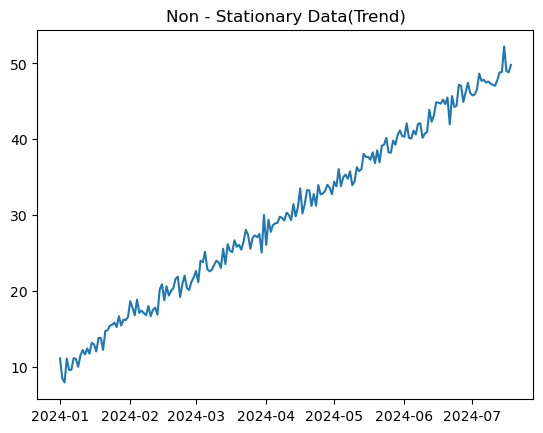

In [49]:
#Visualise

plt.plot(df['Price'])
plt.title('Non - Stationary Data(Trend)')
plt.show()

# 2: The ADF Test ( "Is it Flat?" Detector)

We can't just look at it; we need a p-value.

**ADF Test (Augmented Dickey-Fuller):**

Null Hypothesis: The data is Non-Stationary (Bad).

P-Value > 0.05: We accept Null (It is Not Stationary).

P-Value < 0.05: We reject Null (It Is Stationary).

## `A sequence of values recorded in order over time, where past values can help predict future ones is called Time - Series.`

In [73]:
#function to print the results

def adf_check(time_series):
    result = adfuller(time_series)
    print(f"ADF  Statistic : {result[0]}")
    print(f"P value : {result[1]}")
    if result[1]<= 0.05:
        print("Data is STATIONARY (ready for moedeling)")
    else:
        print('Data is NON-STATIONARY (Needs fixing)')

In [74]:
adf_check(df['Price'])

ADF  Statistic : -0.6925314490881028
P value : 0.8486745879362683
Data is NON-STATIONARY (Needs fixing)


# 3: Differencing (The Fix)
We subtract Today from Yesterday.

df.diff() does this automatically.

In [75]:
# apply differencing
df['Price_Diff'] = df['Price'].diff()

print(df)

                Price  Price_Diff
Date                             
2024-01-05   9.557162         NaN
2024-01-06   9.559291    0.002129
2024-01-07  11.109350    1.550059
2024-01-08  11.009441   -0.099909
2024-01-09   9.969136   -1.040305
...               ...         ...
2024-07-14  48.849350    0.048732
2024-07-15  52.228533    3.379183
2024-07-16  48.983754   -3.244779
2024-07-17  48.809932   -0.173822
2024-07-18  49.799736    0.989805

[196 rows x 2 columns]


In [76]:
# note:: first row becomes Nan as it got ntg to subtract form , so drop it
# so it'll start from 2/1/24 than 1/1/24
df.dropna(inplace = True)

In [77]:
print(df)

                Price  Price_Diff
Date                             
2024-01-06   9.559291    0.002129
2024-01-07  11.109350    1.550059
2024-01-08  11.009441   -0.099909
2024-01-09   9.969136   -1.040305
2024-01-10  11.440549    1.471413
...               ...         ...
2024-07-14  48.849350    0.048732
2024-07-15  52.228533    3.379183
2024-07-16  48.983754   -3.244779
2024-07-17  48.809932   -0.173822
2024-07-18  49.799736    0.989805

[195 rows x 2 columns]


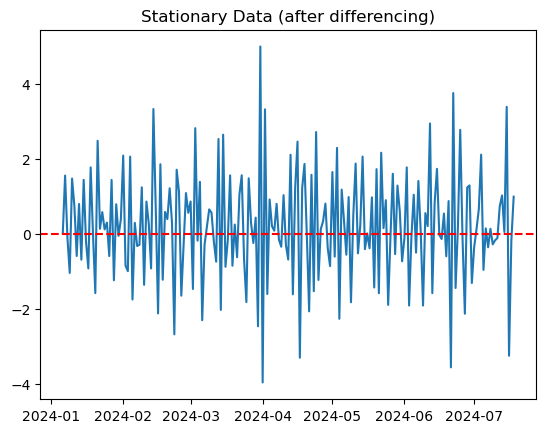

In [78]:
#visualize thr diff

plt.plot(df['Price_Diff'])
plt.title('Stationary Data (after differencing)')
plt.axhline(y=0 , color= 'r' , linestyle= '--')
plt.show()

# 4: Re-Test


In [79]:
#run adf on price diff

adf_check(df['Price_Diff'])

ADF  Statistic : -8.317406945170712
P value : 3.6491844877409863e-13
Data is STATIONARY (ready for moedeling)
